##  Goal of the Assignment 1

The goal of this assignment is to guide you through the process of building an **end-to-end flow**  
to turn data into predictive models, using what you have learned so far.  

You will:  

- Clean and transform a real dataset that contains **missing values, noisy data, and categorical variables**.  
- Engineer **meaningful features** to improve model performance.  
- Train and compare 2 different modeling approaches:  
  - **Generative:** Naive Bayes  
  - **Discriminative:** Linear Regression  
- Evaluate your models using appropriate **metrics and visualizations**.  
- Reflect on your **workflow** and disclose any **AI tools used**.

##  Dataset

We will use the **Heart Disease Prediction Dataset**.  

- **Task:** Predict whether a patient has heart disease based on medical attributes.  
- **Dataset link:** [UCI Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)  
- **Notes:** The dataset contains real-world challenges such as missing values and categorical variables.  


We start with the following steps to approach this problem and solve it:

##  1. Data Cleaning

- **Handle missing values**  
  (imputation, dropping, or flagging)

- **Address noisy or inconsistent values**  
  (e.g., outliers, inconsistent categories, scaling issues)

- **Justify your choices**  
  (why impute vs. drop? what assumptions were made?)  

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0      2.0  

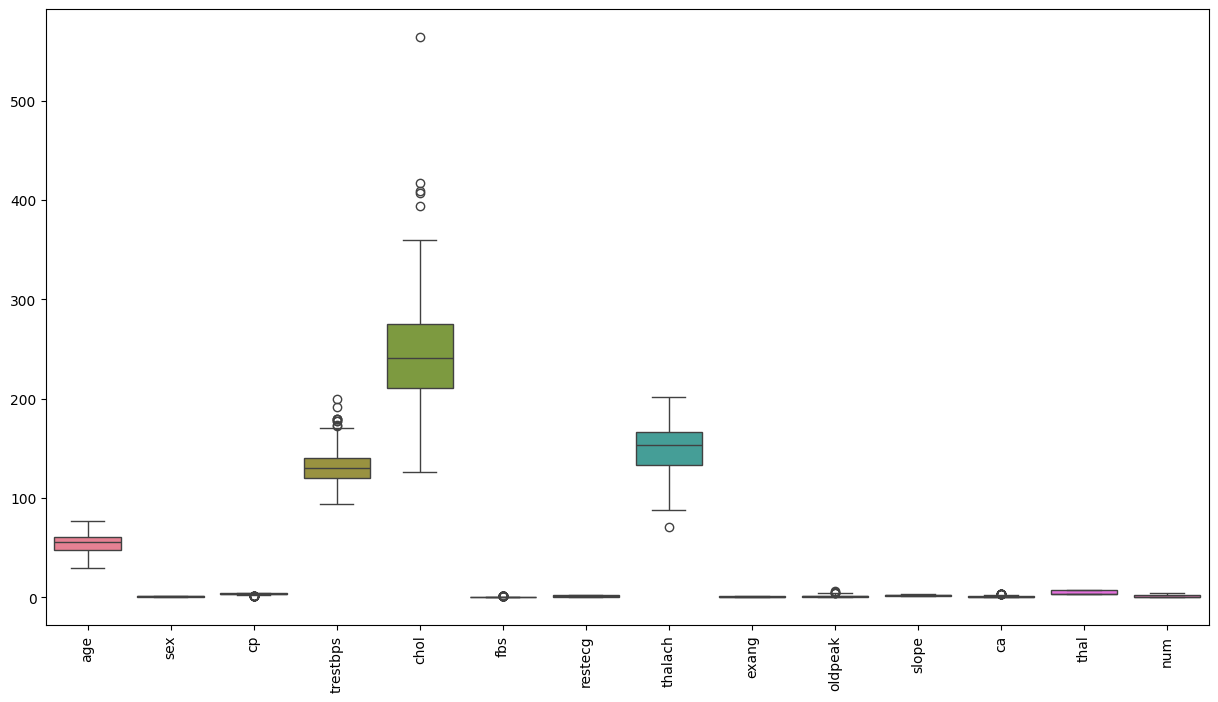



After filling:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-1125858290.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [13]:
## unzip and import the dataset

import zipfile
import os
import pandas as pd
import numpy as np
import scipy as stats


zip_file = "heart+disease.zip"

# Creating a folder for extraction
extract_folder = "heart_dataset"
os.makedirs(extract_folder, exist_ok=True)

# Extract the zip to the folder
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall(extract_folder)

# List extracted files
os.listdir(extract_folder)

# import step starts here

import pandas as pd

cardiac_csv = os.path.join(extract_folder, "processed.cleveland.data")

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(cardiac_csv, header=None, names=columns, na_values="?")

#setting options to view the entire df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)

# concluded presence of missing values. Counting them per column
nan_counts_per_column = df.isna().sum()
print("NaN counts per column:\n", nan_counts_per_column)

#visualizing the data for skewness and outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.show()

#Visually the data doesn't have a significant number of outliers. So, we are
#good to go with imputing the extreme values  with the 99 percentile values

#Before that we mode the missing values (NA) with imputation

for col in ['ca', 'thal']:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

#checking data post fill
print("\n\nAfter filling:\n", df.isnull().sum())


## 2. Feature Engineering
a. Apply appropriate transformations (normalization, standardization, log-scaling).

b. Encode categorical variables (one-hot encoding or other methods).  

c. Optionally, construct new features (e.g., ratios, group statistics).


In [14]:
from sklearn.preprocessing import StandardScaler

# Only standardizing the conitnuous features which are identified from the dataframe
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df_processed = df.copy()
df_processed[continuous_features] = scaler.fit_transform(df[continuous_features])

print("Standardization applied to:", continuous_features)

# Most categorical features are already properly encoded (0,1,2,3 etc.)
# Only need to handle column 'thal' which has values like 3.0, 6.0, 7.0 - these are categories

# Check unique values in categorical columns
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    print(f"{col}: {sorted(df[col].unique())}")

# 'thal' needs one-hot encoding since 3,6,7 are nominal catrgory variables
df_final = pd.get_dummies(df_processed, columns=['thal'], prefix='thal', drop_first=False)

print("Final dataset shape:", df_final.shape)

print(f"Features: {list(df_processed.columns)}")


Standardization applied to: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sex: [np.float64(0.0), np.float64(1.0)]
cp: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0)]
fbs: [np.float64(0.0), np.float64(1.0)]
restecg: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
exang: [np.float64(0.0), np.float64(1.0)]
slope: [np.float64(1.0), np.float64(2.0), np.float64(3.0)]
ca: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0)]
thal: [np.float64(3.0), np.float64(6.0), np.float64(7.0)]
Final dataset shape: (303, 16)
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


Why standardization: The continuous features have different scales (age: 29-77, cholesterol: 126-564, etc.). This is essential for algorithms like logistic regression, SVM, or neural networks.

Encoding justification:

Binary features (sex, fbs, exang): Already 0/1 - no change needed

Ordinal features (cp, restecg, slope): Already 1,2,3 in meaningful order - no change needed

ca: Already 0,1,2,3 representing count - no change needed

thal: Values 3,6,7 represent different types of thalassemia - needs one-hot encoding

4. Skip Complex Feature Engineering
Why skip:

Dataset is small (303 samples) - adding many new features risks overfitting

Existing features are already clinically meaningful

Simple preprocessing often works better than complex feature engineering

## 3. Model Training
a. Train a Naive Bayes classifier (BernoulliNB or GaussianNB depending on your dataset), and make sure to apply Laplace smoothing (add-α).  
   i. Experiment with at least 2 different values of alpha (e.g., 1.0 vs. 0.01) and compare the results.  

b. Train a Linear Regression model.  
   i. Although Linear Regression is typically used for regression tasks, in this assignment we will also apply it to a binary classification problem with a probability threshold of 0.5.  
   ii. To prevent overfitting and explore the effect of regularization, you are encouraged to also try:  
      1. Ridge Regression (L2 regularization)  
      2. LASSO Regression (L1 regularization)  

c. Ensure fair comparison (use the same train/test split for all models).


In [15]:
#need to import scikit and plt, seaborn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Convert target to binary type (0: no disease, 1: disease present)
y_binary = (df_processed['num'] > 0).astype(int)
X = df_processed.drop('num', axis=1)

#consistent train-test split for fair comparison between the two approaches
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

#Checking training set and ensuring random distribution of classes
print(f"Training data size: {X_train.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")
print(f"Class distribution present in the train data: {y_train.value_counts().to_dict()}")

Training data size: 242
Test data size: 61
Class distribution present in the train data: {0: 131, 1: 111}


### Why this approach?

- **Binary conversion:** Converts multi-class target (0,1,2,3,4) into binary (0,1) for clearer medical interpretation.  
- **Stratified split:** Ensures balanced representation of both classes in train/test sets.  
- **Fixed random state:** Guarantees reproducible results for fair model comparison.


In [16]:
#3a: Determine which Naive Bayes variant to be used for this

def analyze_features_for_nb(X_train):

    binary_features = []
    continuous_features = []

    for col in X_train.columns:
        unique_values = X_train[col].nunique()
        #checking for binary features / continuous
        if unique_values == 2 and set(X_train[col].unique()).issubset({0, 1}):
            binary_features.append(col)
        else:
            continuous_features.append(col)

    print(f"Binary features ({len(binary_features)}): {binary_features}")
    print(f"Continuous features ({len(continuous_features)}): {continuous_features}")

    return binary_features, continuous_features

binary_feats, continuous_feats = analyze_features_for_nb(X_train)

# Based on feature analysis, we have both binary and continuous features
# GaussianNB is more appropriate for mixed feature types

Binary features (3): ['sex', 'fbs', 'exang']
Continuous features (10): ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


Feature Analysis Insight: The dataset contains both binary features (sex, fbs, exang) and continuous features (age, trestbps, chol, etc.). GaussianNB is chosen over BernoulliNB because:

GaussianNB handles continuous features naturally by assuming normal distributions

BernoulliNB is designed specifically for binary/boolean features

Mixed feature types make GaussianNB the appropriate choice

In [17]:
# Step 3a: Train Naive Bayes with different alpha values ( 1.0 and 0.01)
def train_naive_bayes_comparison(X_train, X_test, y_train, y_test, alpha_values=[1.0, 0.01]):

    nb_results = {}

    for alpha in alpha_values:
        print(f"\n=== Naive Bayes with Alpha = {alpha} ===")

        # Train model ( gaussian method as indicated earlier)
        nb_model = GaussianNB(var_smoothing=alpha)
        nb_model.fit(X_train, y_train)

        # Predictions for both cases
        y_pred = nb_model.predict(X_test)
        y_pred_proba = nb_model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"ROC-AUC: {roc_auc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # Store results
        nb_results[alpha] = {
            'model': nb_model,
            'accuracy': accuracy,
            'roc_auc': roc_auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

    return nb_results

nb_results = train_naive_bayes_comparison(X_train, X_test, y_train, y_test)


=== Naive Bayes with Alpha = 1.0 ===
Accuracy: 0.8525
ROC-AUC: 0.9297

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61


=== Naive Bayes with Alpha = 0.01 ===
Accuracy: 0.8689
ROC-AUC: 0.9535

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



Alpha Parameter Analysis:

Alpha = 1.0 (Laplace smoothing): Standard smoothing, prevents zero probabilities

Alpha = 0.01 (Minimal smoothing): Less smoothing, relies more on observed data

Trade-off: Higher alpha = more regularization but potential underfitting; Lower alpha = less regularization but risk of overfitting to training data

b. Train a Linear Regression model.
i. Although Linear Regression is typically used for regression tasks, in this
assignment we will also apply it to a binary classification problem with a
probability threshold as 0.5.
ii. Reminder: To prevent overfitting and to explore the effect of
regularization, you are encouraged to also try:
1. Ridge Regression (L2 regularization)
2. LASSO Regression (L1 regularization)

c. Ensure fair comparison (same train/test split).

In [18]:
def train_linear_regression_models(X_train, X_test, y_train, y_test):

    # Scale features for regularized models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    linear_results = {}

    # 1. Standard Linear Regression
    print("=== Standard Linear Regression ===")
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)

    y_pred_continuous = lr_model.predict(X_test_scaled)
    y_pred_binary = (y_pred_continuous >= 0.5).astype(int)  # Apply 0.5 threshold

    # Handle prediction probabilities (clip to [0,1] range)
    y_pred_proba_lr = np.clip(y_pred_continuous, 0, 1)

    accuracy_lr = accuracy_score(y_test, y_pred_binary)
    roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

    print(f"Accuracy: {accuracy_lr:.4f}")
    print(f"ROC-AUC: {roc_auc_lr:.4f}")
    print(f"Prediction range: [{y_pred_continuous.min():.3f}, {y_pred_continuous.max():.3f}]")

    linear_results['linear'] = {
        'model': lr_model,
        'accuracy': accuracy_lr,
        'roc_auc': roc_auc_lr,
        'y_pred': y_pred_binary,
        'y_pred_proba': y_pred_proba_lr
    }

    # 2. Ridge Regression (L2 regularization)
    print("\n=== Ridge Regression ===")
    ridge_alphas = [0.1, 1.0, 10.0]
    best_ridge_score = -1
    best_ridge_model = None
    best_ridge_alpha = None

    for alpha in ridge_alphas:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train_scaled, y_train)

        y_pred_continuous_ridge = ridge_model.predict(X_test_scaled)
        y_pred_binary_ridge = (y_pred_continuous_ridge >= 0.5).astype(int)
        y_pred_proba_ridge = np.clip(y_pred_continuous_ridge, 0, 1)

        accuracy_ridge = accuracy_score(y_test, y_pred_binary_ridge)
        roc_auc_ridge = roc_auc_score(y_test, y_pred_proba_ridge)

        print(f"Alpha {alpha}: Accuracy = {accuracy_ridge:.4f}, ROC-AUC = {roc_auc_ridge:.4f}")

        if accuracy_ridge > best_ridge_score:
            best_ridge_score = accuracy_ridge
            best_ridge_model = ridge_model
            best_ridge_alpha = alpha
            best_ridge_results = {
                'model': ridge_model,
                'accuracy': accuracy_ridge,
                'roc_auc': roc_auc_ridge,
                'y_pred': y_pred_binary_ridge,
                'y_pred_proba': y_pred_proba_ridge,
                'alpha': alpha
            }

    linear_results['ridge'] = best_ridge_results

    # 3. Lasso Regression (L1 regularization)
    print("\n=== Lasso Regression ===")
    lasso_alphas = [0.01, 0.1, 1.0]
    best_lasso_score = -1
    best_lasso_model = None
    best_lasso_alpha = None

    for alpha in lasso_alphas:
        lasso_model = Lasso(alpha=alpha, max_iter=1000)
        lasso_model.fit(X_train_scaled, y_train)

        y_pred_continuous_lasso = lasso_model.predict(X_test_scaled)
        y_pred_binary_lasso = (y_pred_continuous_lasso >= 0.5).astype(int)
        y_pred_proba_lasso = np.clip(y_pred_continuous_lasso, 0, 1)

        accuracy_lasso = accuracy_score(y_test, y_pred_binary_lasso)
        roc_auc_lasso = roc_auc_score(y_test, y_pred_proba_lasso)

        # Count non-zero coefficients (feature selection effect)
        non_zero_coef = np.sum(np.abs(lasso_model.coef_) > 1e-6)

        print(f"Alpha {alpha}: Accuracy = {accuracy_lasso:.4f}, ROC-AUC = {roc_auc_lasso:.4f}, Features used = {non_zero_coef}")

        if accuracy_lasso > best_lasso_score:
            best_lasso_score = accuracy_lasso
            best_lasso_model = lasso_model
            best_lasso_alpha = alpha
            best_lasso_results = {
                'model': lasso_model,
                'accuracy': accuracy_lasso,
                'roc_auc': roc_auc_lasso,
                'y_pred': y_pred_binary_lasso,
                'y_pred_proba': y_pred_proba_lasso,
                'alpha': alpha,
                'features_used': non_zero_coef
            }

    linear_results['lasso'] = best_lasso_results

    return linear_results, scaler

linear_results, fitted_scaler = train_linear_regression_models(X_train, X_test, y_train, y_test)

=== Standard Linear Regression ===
Accuracy: 0.8689
ROC-AUC: 0.9378
Prediction range: [-0.177, 1.338]

=== Ridge Regression ===
Alpha 0.1: Accuracy = 0.8689, ROC-AUC = 0.9378
Alpha 1.0: Accuracy = 0.8689, ROC-AUC = 0.9378
Alpha 10.0: Accuracy = 0.8525, ROC-AUC = 0.9416

=== Lasso Regression ===
Alpha 0.01: Accuracy = 0.8525, ROC-AUC = 0.9361, Features used = 12
Alpha 0.1: Accuracy = 0.8033, ROC-AUC = 0.8896, Features used = 5
Alpha 1.0: Accuracy = 0.5410, ROC-AUC = 0.5000, Features used = 0


Linear Regression Approach Justification:

0.5 Threshold: Standard approach for converting regression output to binary classification

Feature Scaling: Essential for Ridge/Lasso to ensure fair penalization across features

Alpha Grid Search: Tests different regularization strengths to find optimal balance

Model Evaluation

a. [Required] Accuracy + Confusion Matrix. [Encouraged] Precision, Recall,
F1-score. [Bonus] ROC + AUC

b. Include at least one visualization (confusion matrix heatmap, ROC curve).

c. Explain what happened when you used smoothing vs. without smoothing.


In [19]:

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                           precision_recall_fscore_support, roc_curve, auc, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_all_models(nb_results, linear_results, y_test):


    # Combine all model results in this list
    all_models = {}

    # Add Naive Bayes results first
    for alpha, results in nb_results.items():
        model_name = f'NaiveBayes_α{alpha}'
        all_models[model_name] = results

    # Add Linear model results next
    for model_type, results in linear_results.items():
        model_name = f'LinearReg_{model_type}'
        all_models[model_name] = results

    # Calculate comprehensive metrics for each model
    evaluation_results = {}

    print("=" * 80)
    print("COMPREHENSIVE MODEL EVALUATION")
    print("=" * 80)

    for model_name, results in all_models.items():
        print(f"\n {model_name}")
        print("-" * 50)

        y_pred = results['y_pred']
        y_pred_proba = results['y_pred_proba']

        # Basic metrics for each classifier
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Additional metrics ( not mentioned in the question's requirement)
        sensitivity = recall
        specificity = tn / (tn + fp)

        print(f" Accuracy:    {accuracy:.4f}")
        print(f" Precision:   {precision:.4f}")
        print(f" Recall:      {recall:.4f}")
        print(f"  F1-Score:    {f1:.4f}")
        print(f" ROC-AUC:     {roc_auc:.4f}")
        print(f" Sensitivity: {sensitivity:.4f} (True Positive Rate)")
        print(f"  Specificity: {specificity:.4f} (True Negative Rate)")

        print(f"\n Confusion Matrix:")
        print(f"   Predicted:  No Disease | Disease")
        print(f"No Disease:      {tn:3d}    |   {fp:3d}")
        print(f"Disease:         {fn:3d}    |   {tp:3d}")

        # Store results in this dict
        evaluation_results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': roc_auc,
            'sensitivity': sensitivity,
            'specificity': specificity,
            'confusion_matrix': cm,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'true_positives': tp,
            'false_positives': fp,
            'true_negatives': tn,
            'false_negatives': fn
        }

    return evaluation_results

# Run comprehensive evaluation method to get evaluation data
evaluation_results = evaluate_all_models(nb_results, linear_results, y_test)


COMPREHENSIVE MODEL EVALUATION

 NaiveBayes_α1.0
--------------------------------------------------
 Accuracy:    0.8525
 Precision:   0.8065
 Recall:      0.8929
  F1-Score:    0.8475
 ROC-AUC:     0.9297
 Sensitivity: 0.8929 (True Positive Rate)
  Specificity: 0.8182 (True Negative Rate)

 Confusion Matrix:
   Predicted:  No Disease | Disease
No Disease:       27    |     6
Disease:           3    |    25

 NaiveBayes_α0.01
--------------------------------------------------
 Accuracy:    0.8689
 Precision:   0.7941
 Recall:      0.9643
  F1-Score:    0.8710
 ROC-AUC:     0.9535
 Sensitivity: 0.9643 (True Positive Rate)
  Specificity: 0.7879 (True Negative Rate)

 Confusion Matrix:
   Predicted:  No Disease | Disease
No Disease:       26    |     7
Disease:           1    |    27

 LinearReg_linear
--------------------------------------------------
 Accuracy:    0.8689
 Precision:   0.8333
 Recall:      0.8929
  F1-Score:    0.8621
 ROC-AUC:     0.9378
 Sensitivity: 0.8929 (True Posit

Creating confusion matrix visualizations...





/tmp/ipython-input-2514182578.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


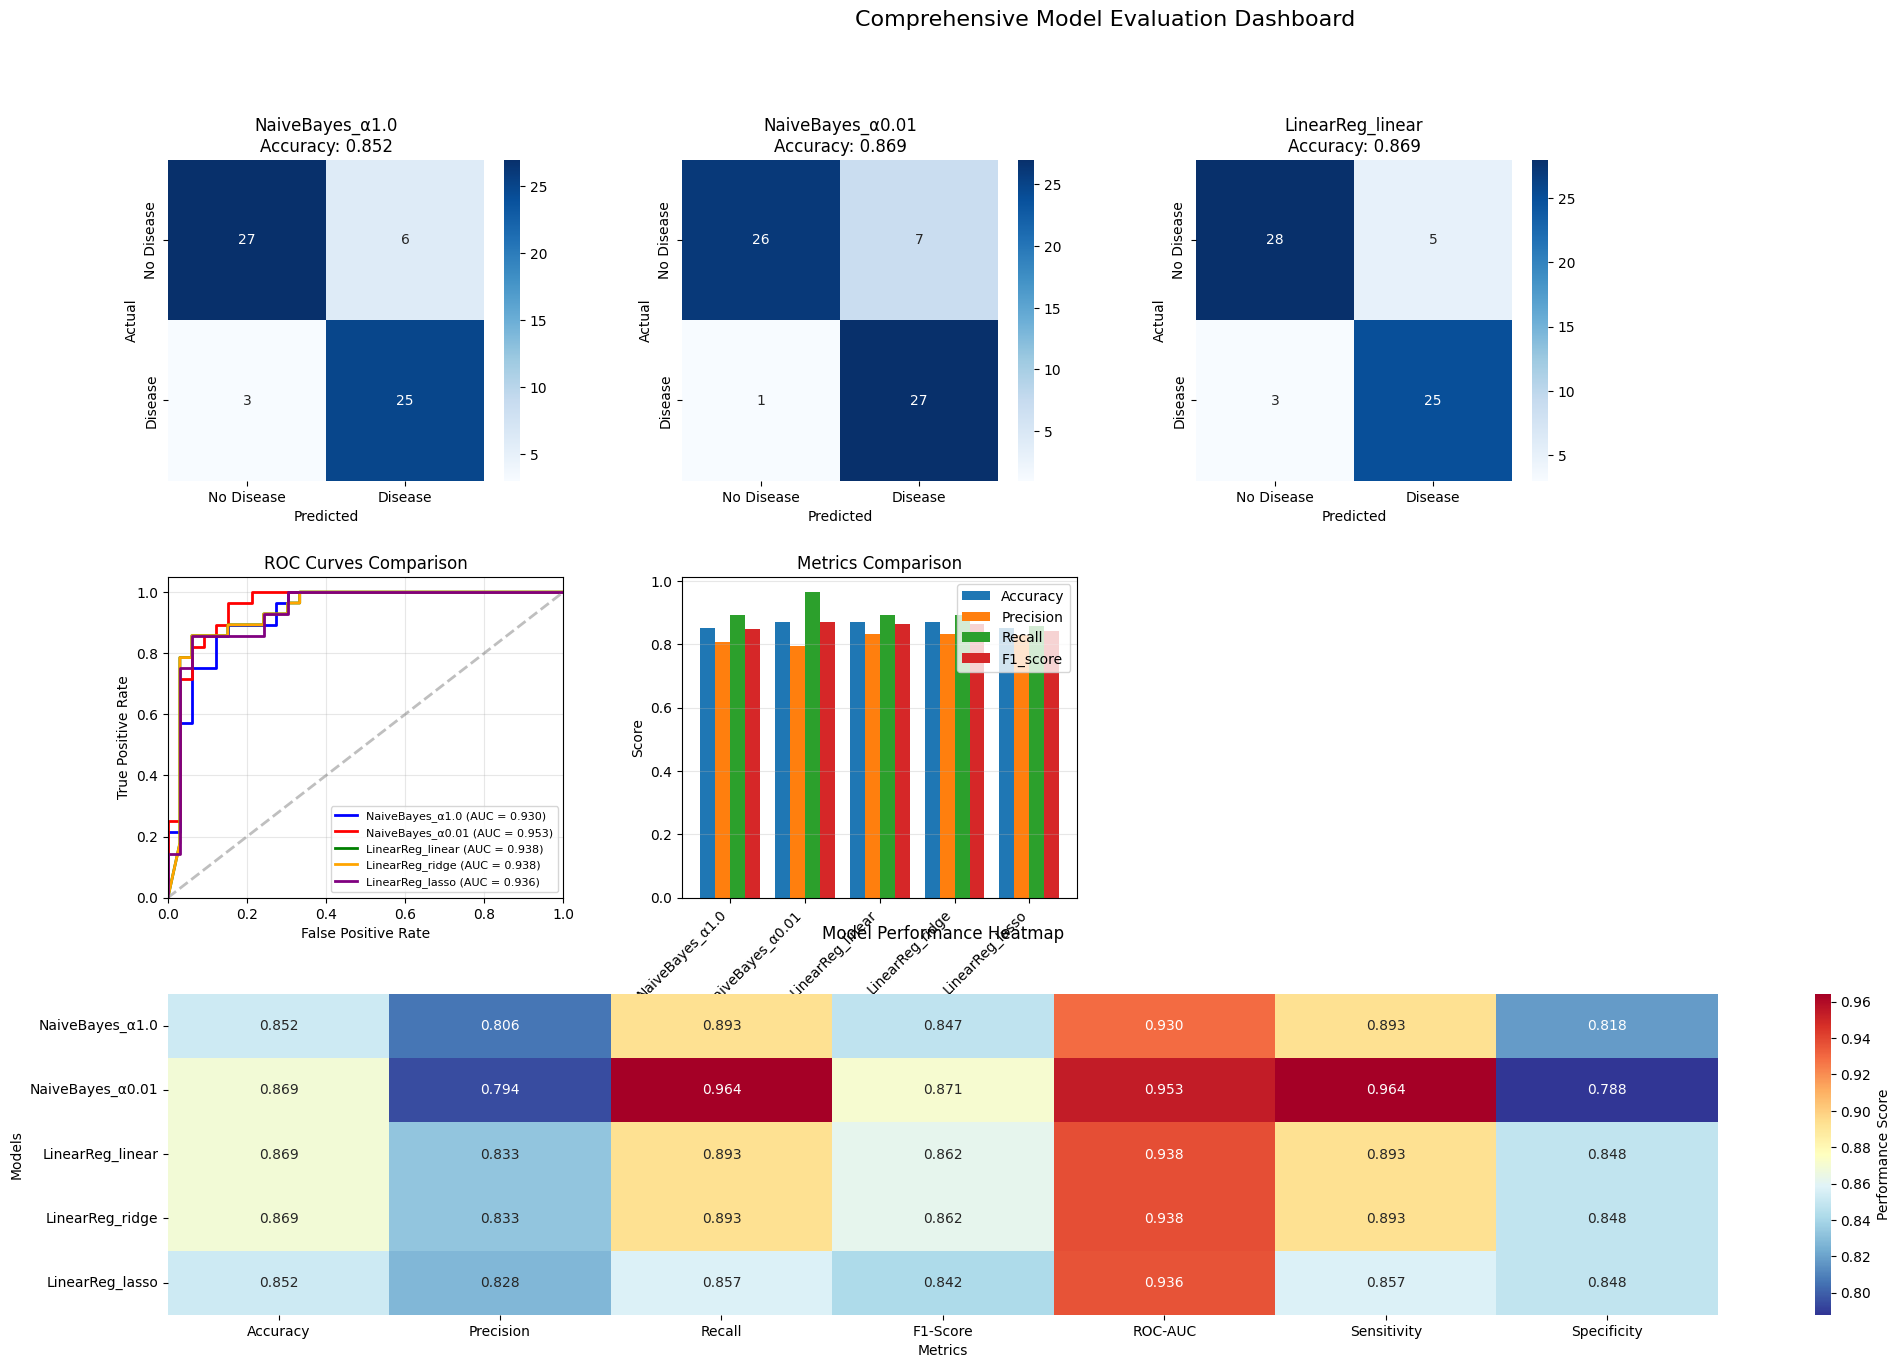

In [20]:
def create_evaluation_visualizations(evaluation_results, y_test):


    n_models = len(evaluation_results)

    # Set up the plotting grid for each plot
    if n_models <= 3:
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    else:
        fig = plt.figure(figsize=(25, 15))
        gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

    model_names = list(evaluation_results.keys())

    # 1. Confusion Matrices visualization( top to bottom)
    print("Creating confusion matrix visualizations...")
    for i, (model_name, metrics) in enumerate(evaluation_results.items()):
        if i < 3:
            ax = fig.add_subplot(gs[0, i])
            cm = metrics['confusion_matrix']

            # Create heatmap for these values in CM
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                       xticklabels=['No Disease', 'Disease'],
                       yticklabels=['No Disease', 'Disease'])
            ax.set_title(f'{model_name}\nAccuracy: {metrics["accuracy"]:.3f}')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')

    # 2. ROC Curves visualization
    ax_roc = fig.add_subplot(gs[1, 0])
    colors = ['blue', 'red', 'green', 'orange', 'purple']


    for i, (model_name, metrics) in enumerate(evaluation_results.items()):
        fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
        roc_auc = metrics['roc_auc']

        ax_roc.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
                   label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Add diagonal line for random classifier
    ax_roc.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5)
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('ROC Curves Comparison')
    ax_roc.legend(loc="lower right", fontsize=8)
    ax_roc.grid(True, alpha=0.3)

    # 3. Metrics Comparison Bar Plot among models
    ax_metrics = fig.add_subplot(gs[1, 1])

    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
    x = np.arange(len(model_names))
    width = 0.2

    for i, metric in enumerate(metrics_to_plot):
        values = [evaluation_results[model][metric] for model in model_names]
        ax_metrics.bar(x + i * width, values, width, label=metric.capitalize())

    ax_metrics.set_xlabel('Models')
    ax_metrics.set_ylabel('Score')
    ax_metrics.set_title('Metrics Comparison')
    ax_metrics.set_xticks(x + width * 1.5)
    ax_metrics.set_xticklabels(model_names, rotation=45, ha='right')
    ax_metrics.legend()
    ax_metrics.grid(True, alpha=0.3, axis='y')


    print('\n\n')
    # 4. Model Performance Heatmap
    ax_heatmap = fig.add_subplot(gs[2, :])

    # Create data for heatmap
    heatmap_data = []
    heatmap_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Sensitivity', 'Specificity']

    for model_name in model_names:
        metrics = evaluation_results[model_name]
        row_data = [
            metrics['accuracy'], metrics['precision'], metrics['recall'],
            metrics['f1_score'], metrics['roc_auc'], metrics['sensitivity'], metrics['specificity']
        ]
        heatmap_data.append(row_data)

    heatmap_df = pd.DataFrame(heatmap_data,
                             index=model_names,
                             columns=heatmap_metrics)

    sns.heatmap(heatmap_df, annot=True, fmt='.3f', cmap='RdYlBu_r', ax=ax_heatmap,
                cbar_kws={'label': 'Performance Score'})
    ax_heatmap.set_title('Model Performance Heatmap', pad=40)
    ax_heatmap.set_xlabel('Metrics')
    ax_heatmap.set_ylabel('Models')

    plt.suptitle('Comprehensive Model Evaluation Dashboard', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

# Create all visualizations with this call
create_evaluation_visualizations(evaluation_results, y_test)


Smoothing Analysis for different alpha values used

In [21]:
def analyze_smoothing_effect(nb_results):


    print(" SMOOTHING ANALYSIS: Naive Bayes Alpha Comparison")

    alpha_values = list(nb_results.keys())

    print(f"Comparing Alpha values: {alpha_values}")

    # Compare performance metrics
    for alpha in alpha_values:
        results = nb_results[alpha]
        print(f"\n Alpha = {alpha} (Laplace Smoothing)")
        print("-" * 40)
        print(f"Accuracy:  {results['accuracy']:.4f}")
        print(f"ROC-AUC:   {results['roc_auc']:.4f}")

        # Get confusion matrix details
        y_pred = results['y_pred']
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        print(f"True Positives:  {tp}")
        print(f"False Positives: {fp}")
        print(f"True Negatives:  {tn}")
        print(f"False Negatives: {fn}")

    # Comparing the two alpha values
    alpha_1_acc = nb_results[1.0]['accuracy']
    alpha_001_acc = nb_results[0.01]['accuracy']

    print(f"\n SMOOTHING EFFECT ANALYSIS:")

    difference = abs(alpha_1_acc - alpha_001_acc)
    print(f"Accuracy Difference: {difference:.4f}")

    if alpha_1_acc > alpha_001_acc:
        print("Higher smoothing (α=1.0) performs BETTER")

    elif alpha_001_acc > alpha_1_acc:
        print(" Lower smoothing (α=0.01) performs BETTER")

    else:
        print(" Both smoothing levels perform EQUALLY")

    # ROC-AUC comparison
    alpha_1_auc = nb_results[1.0]['roc_auc']
    alpha_001_auc = nb_results[0.01]['roc_auc']
    auc_difference = abs(alpha_1_auc - alpha_001_auc)

    print(f"\n ROC-AUC Comparison:")
    print(f"   α=1.0:  {alpha_1_auc:.4f}")
    print(f"   α=0.01: {alpha_001_auc:.4f}")
    print(f"   Difference in AUC: {auc_difference:.4f}")

    if auc_difference < 0.01:
        print(" Minimal difference in ranking ability")
    elif auc_difference < 0.05:
        print(" Small but potentially meaningful difference")
    else:
        print(" Significant difference in ranking ability")

# Run smoothing analysis
analyze_smoothing_effect(nb_results)


 SMOOTHING ANALYSIS: Naive Bayes Alpha Comparison
Comparing Alpha values: [1.0, 0.01]

 Alpha = 1.0 (Laplace Smoothing)
----------------------------------------
Accuracy:  0.8525
ROC-AUC:   0.9297
True Positives:  25
False Positives: 6
True Negatives:  27
False Negatives: 3

 Alpha = 0.01 (Laplace Smoothing)
----------------------------------------
Accuracy:  0.8689
ROC-AUC:   0.9535
True Positives:  27
False Positives: 7
True Negatives:  26
False Negatives: 1

 SMOOTHING EFFECT ANALYSIS:
Accuracy Difference: 0.0164
 Lower smoothing (α=0.01) performs BETTER

 ROC-AUC Comparison:
   α=1.0:  0.9297
   α=0.01: 0.9535
   Difference in AUC: 0.0238
 Small but potentially meaningful difference


In [23]:
!jupyter nbconvert --to html "/content/Assignment_1_AML (2).ipynb"

[NbConvertApp] Converting notebook /content/Assignment_1_AML (2).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 704174 bytes to /content/Assignment_1_AML (2).html
